In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [102]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/Sleep_health_and_lifestyle_dataset.csv")

df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


Quality of sleep is on a scale of 1-10
Sleep duration- hours
Physical Activity Level - the amount of minutes someone engages in a physical activity in a day
Stress level - on a scale of 1-10
Heart Rate in Bpm

In [103]:
df.shape

(374, 13)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [105]:
df.isna().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [106]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [107]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('No Disorder')
display(df['Sleep Disorder'].unique())
#Weve filled the null values

array(['No Disorder', 'Sleep Apnea', 'Insomnia'], dtype=object)

In [108]:
df["BMI Category"].unique() #Theres a problem

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [109]:
df['BMI Category'] = df['BMI Category'].replace('Normal', 'Normal Weight')
display(df['BMI Category'].unique())

array(['Overweight', 'Normal Weight', 'Obese'], dtype=object)

In [110]:
df["Occupation"].unique() #QUESTION

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

In [111]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [112]:
df.drop

<bound method DataFrame.drop of      Person ID  Gender  Age            Occupation  Sleep Duration  \
0            1    Male   27     Software Engineer             6.1   
1            2    Male   28                Doctor             6.2   
2            3    Male   28                Doctor             6.2   
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
..         ...     ...  ...                   ...             ...   
369        370  Female   59                 Nurse             8.1   
370        371  Female   59                 Nurse             8.0   
371        372  Female   59                 Nurse             8.1   
372        373  Female   59                 Nurse             8.1   
373        374  Female   59                 Nurse             8.1   

     Quality of Sleep  Physical Activity Level  Stress Level   BMI Category  \
0                   6                       42             6     Overweight   
1                   6                       60             8  Normal Weight   
2                   6                       60             8  Normal Weight   
3                   4                       30             8          Obese   
4                   4                       30             8          Obese   
..                ...                      ...           ...            ...   
369                 9                       75             3     Overweight   
370                 9                       75             3     Overweight   
371                 9                       75             3     Overweight   
372                 9                       75             3     Overweight   
373                 9                       75             3     Overweight   

    Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0           126/83          77         4200    No Disorder  
1           125/80          75        10000    No Disorder  
2           125/80          75        10000    No Disorder  
3           140/90          85         3000    Sleep Apnea  
4           140/90          85         3000    Sleep Apnea  
..             ...         ...          ...            ...  
369         140/95          68         7000    Sleep Apnea  
370         140/95          68         7000    Sleep Apnea  
371         140/95          68         7000    Sleep Apnea  
372         140/95          68         7000    Sleep Apnea  
373         140/95          68         7000    Sleep Apnea  

[374 rows x 13 columns]>

In [113]:
#In terms of blood pressure someone is classified according to the highest applicable category


df['Systolic'] = df['Blood Pressure'].apply(lambda x: int(x.split('/')[0]))
df['Diastolic'] = df['Blood Pressure'].apply(lambda x: int(x.split('/')[1]))

def classify_bp(row):
    if row['Systolic'] < 120 and row['Diastolic'] < 80 :
        return 'Normal'
    elif row['Systolic'] <= 129 and row["Diastolic"] <= 80:
        return 'Elevated'
    elif row['Systolic'] >= 130 or row['Diastolic'] > 80:
        return 'Hypertension Stage 1'
    elif row['Systolic'] >= 140 or row['Diastolic'] >= 90:
        return 'Hypertension Stage 2'
    else:
        return 'Error'

df['Blood Pressure Status'] = df.apply(classify_bp, axis=1)

display(df[['Blood Pressure', 'Systolic', 'Diastolic', 'Blood Pressure Status']].head(5))

,Blood Pressure,Systolic,Diastolic,Blood Pressure Status
0,126/83,126,83,Hypertension Stage 1
1,125/80,125,80,Elevated
2,125/80,125,80,Elevated
3,140/90,140,90,Hypertension Stage 1
4,140/90,140,90,Hypertension Stage 1


In [114]:
df.groupby('Blood Pressure Status')['Quality of Sleep'].mean()

,Quality of Sleep
Blood Pressure Status,
Elevated,7.410714
Hypertension Stage 1,7.126697
Normal,8.048780


In [115]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic,Blood Pressure Status
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder,126,83,Hypertension Stage 1
1,2,Male,28,Doctor,6.2,6,60,8,Normal Weight,125/80,75,10000,No Disorder,125,80,Elevated
2,3,Male,28,Doctor,6.2,6,60,8,Normal Weight,125/80,75,10000,No Disorder,125,80,Elevated
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90,Hypertension Stage 1
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90,Hypertension Stage 1


In [116]:
df = df.drop('Systolic', axis=1)
display(df.head())

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Diastolic,Blood Pressure Status
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder,83,Hypertension Stage 1
1,2,Male,28,Doctor,6.2,6,60,8,Normal Weight,125/80,75,10000,No Disorder,80,Elevated
2,3,Male,28,Doctor,6.2,6,60,8,Normal Weight,125/80,75,10000,No Disorder,80,Elevated
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,90,Hypertension Stage 1
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,90,Hypertension Stage 1


In [117]:
df = df.drop('Diastolic', axis=1)
display(df.head())

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Blood Pressure Status
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder,Hypertension Stage 1
1,2,Male,28,Doctor,6.2,6,60,8,Normal Weight,125/80,75,10000,No Disorder,Elevated
2,3,Male,28,Doctor,6.2,6,60,8,Normal Weight,125/80,75,10000,No Disorder,Elevated
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Hypertension Stage 1
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Hypertension Stage 1


DISTRIBUTION OF THE VARIOUS COLUMNS

In [118]:
df["Gender"].value_counts()

,count
Gender,
Male,189
Female,185


In [119]:
df["Occupation"].value_counts()

,count
Occupation,
Nurse,73
Doctor,71
Engineer,63
Lawyer,47
Teacher,40
Accountant,37
Salesperson,32
Scientist,4
Software Engineer,4


In [120]:
df['BMI Category'].value_counts()

,count
BMI Category,
Normal Weight,216
Overweight,148
Obese,10


In [121]:
df["Sleep Disorder"].value_counts()

,count
Sleep Disorder,
No Disorder,219
Sleep Apnea,78
Insomnia,77


In [122]:
df["Blood Pressure Status"].value_counts()

,count
Blood Pressure Status,
Hypertension Stage 1,221
Elevated,112
Normal,41


In [123]:
print(len(df["Age"].unique()))

31


In [124]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Blood Pressure Status
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder,Hypertension Stage 1
1,2,Male,28,Doctor,6.2,6,60,8,Normal Weight,125/80,75,10000,No Disorder,Elevated
2,3,Male,28,Doctor,6.2,6,60,8,Normal Weight,125/80,75,10000,No Disorder,Elevated
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Hypertension Stage 1
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Hypertension Stage 1


Distribution of various columns

/tmp/ipython-input-1402399106.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age)


<Axes: title={'center': 'Boxplot'}, ylabel='Age'>

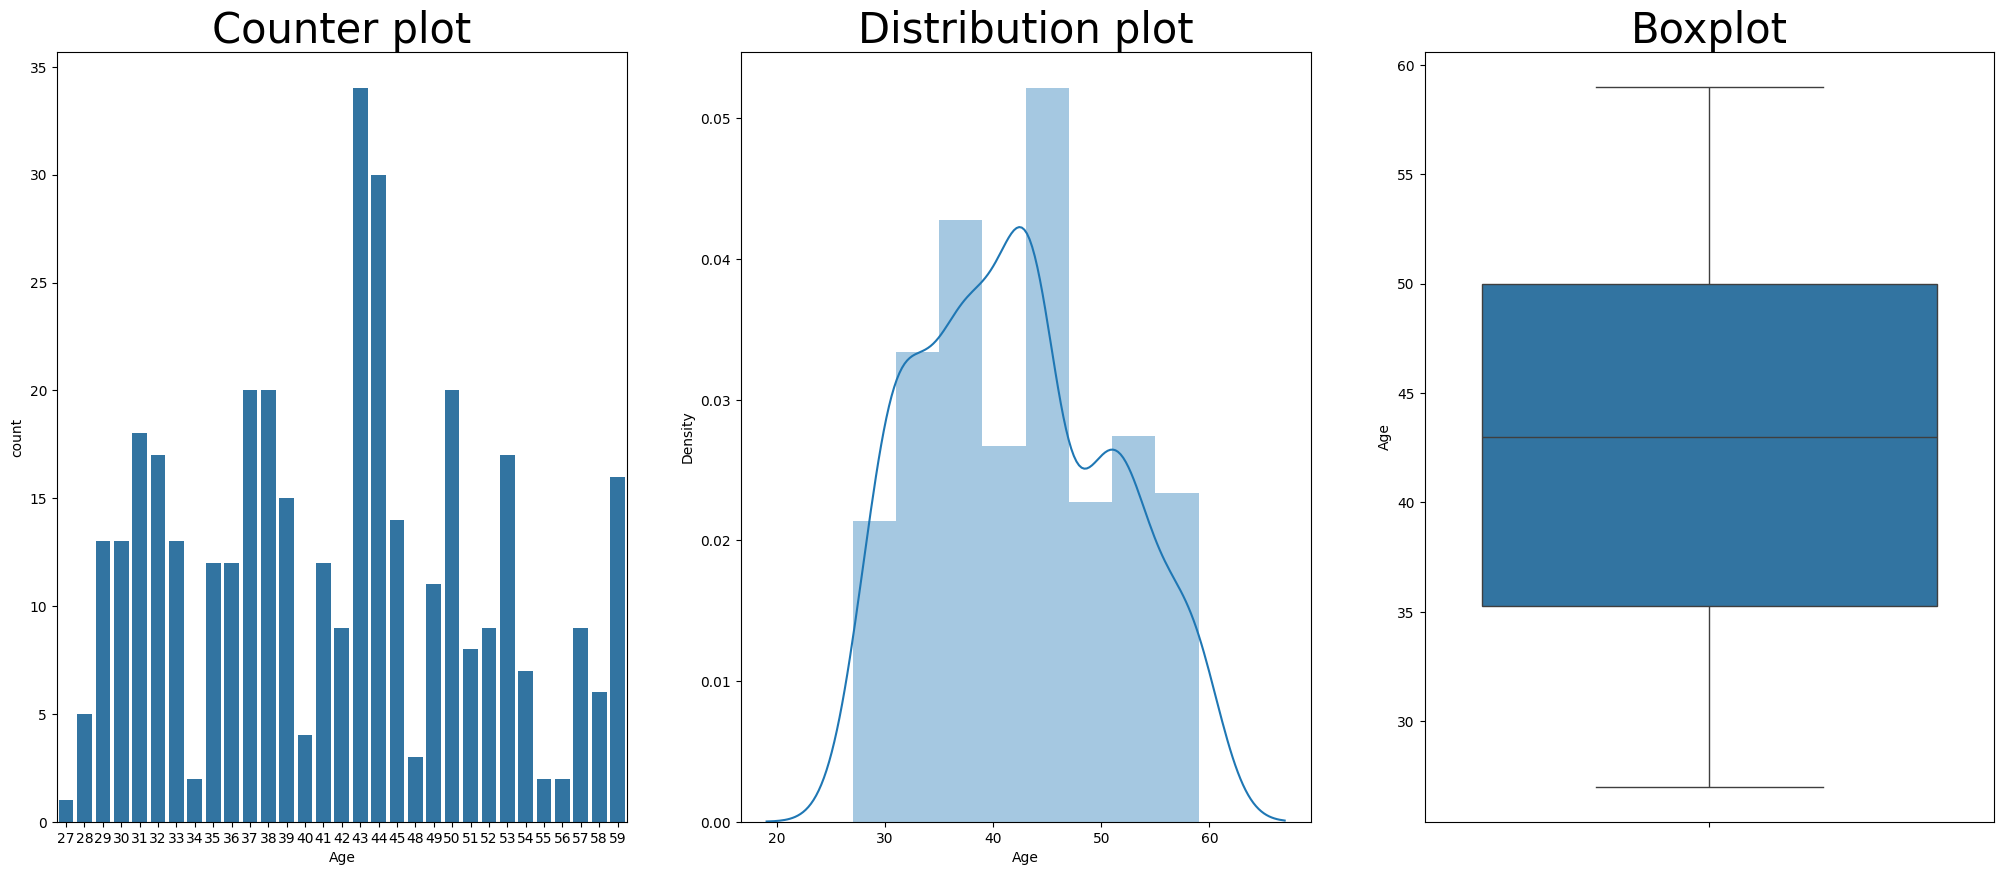

In [125]:
plt.figure(figsize=(25,10))
plt.subplot(1,3,1)
plt.title('Counter plot',fontsize=30)
sns.countplot(x='Age',data=df)
plt.subplot(1,3,2)
plt.title('Distribution plot',fontsize=30)
sns.distplot(df.Age)
plt.subplot(1,3,3)
plt.title('Boxplot',fontsize=30)
sns.boxplot(y=df.Age)

/tmp/ipython-input-4223603772.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Stress Level"])


<Axes: title={'center': 'Boxplot'}, ylabel='Stress Level'>

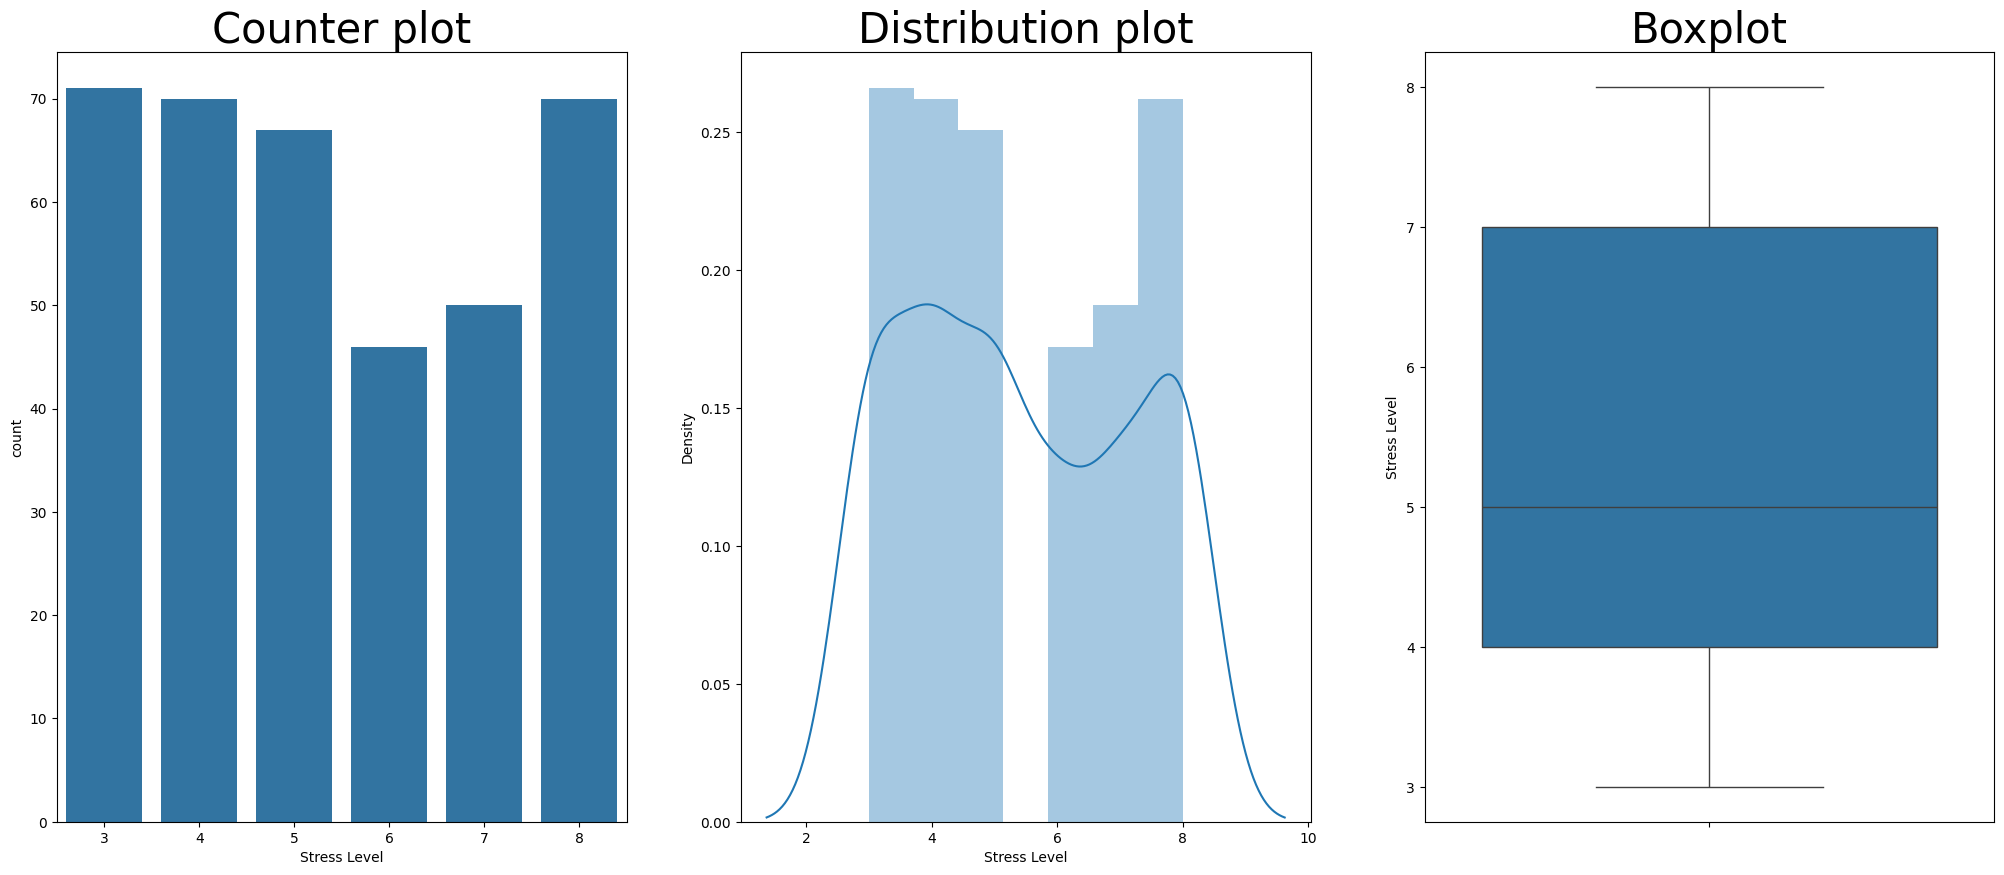

In [126]:
plt.figure(figsize=(25,10))
plt.subplot(1,3,1)
plt.title('Counter plot',fontsize=30)
sns.countplot(x='Stress Level',data=df)
plt.subplot(1,3,2)
plt.title('Distribution plot',fontsize=30)
sns.distplot(df["Stress Level"])
plt.subplot(1,3,3)
plt.title('Boxplot',fontsize=30)
sns.boxplot(y=df["Stress Level"])

Quality of Sleep

/tmp/ipython-input-2873236056.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Quality of Sleep"])


<Axes: title={'center': 'Boxplot'}, ylabel='Quality of Sleep'>

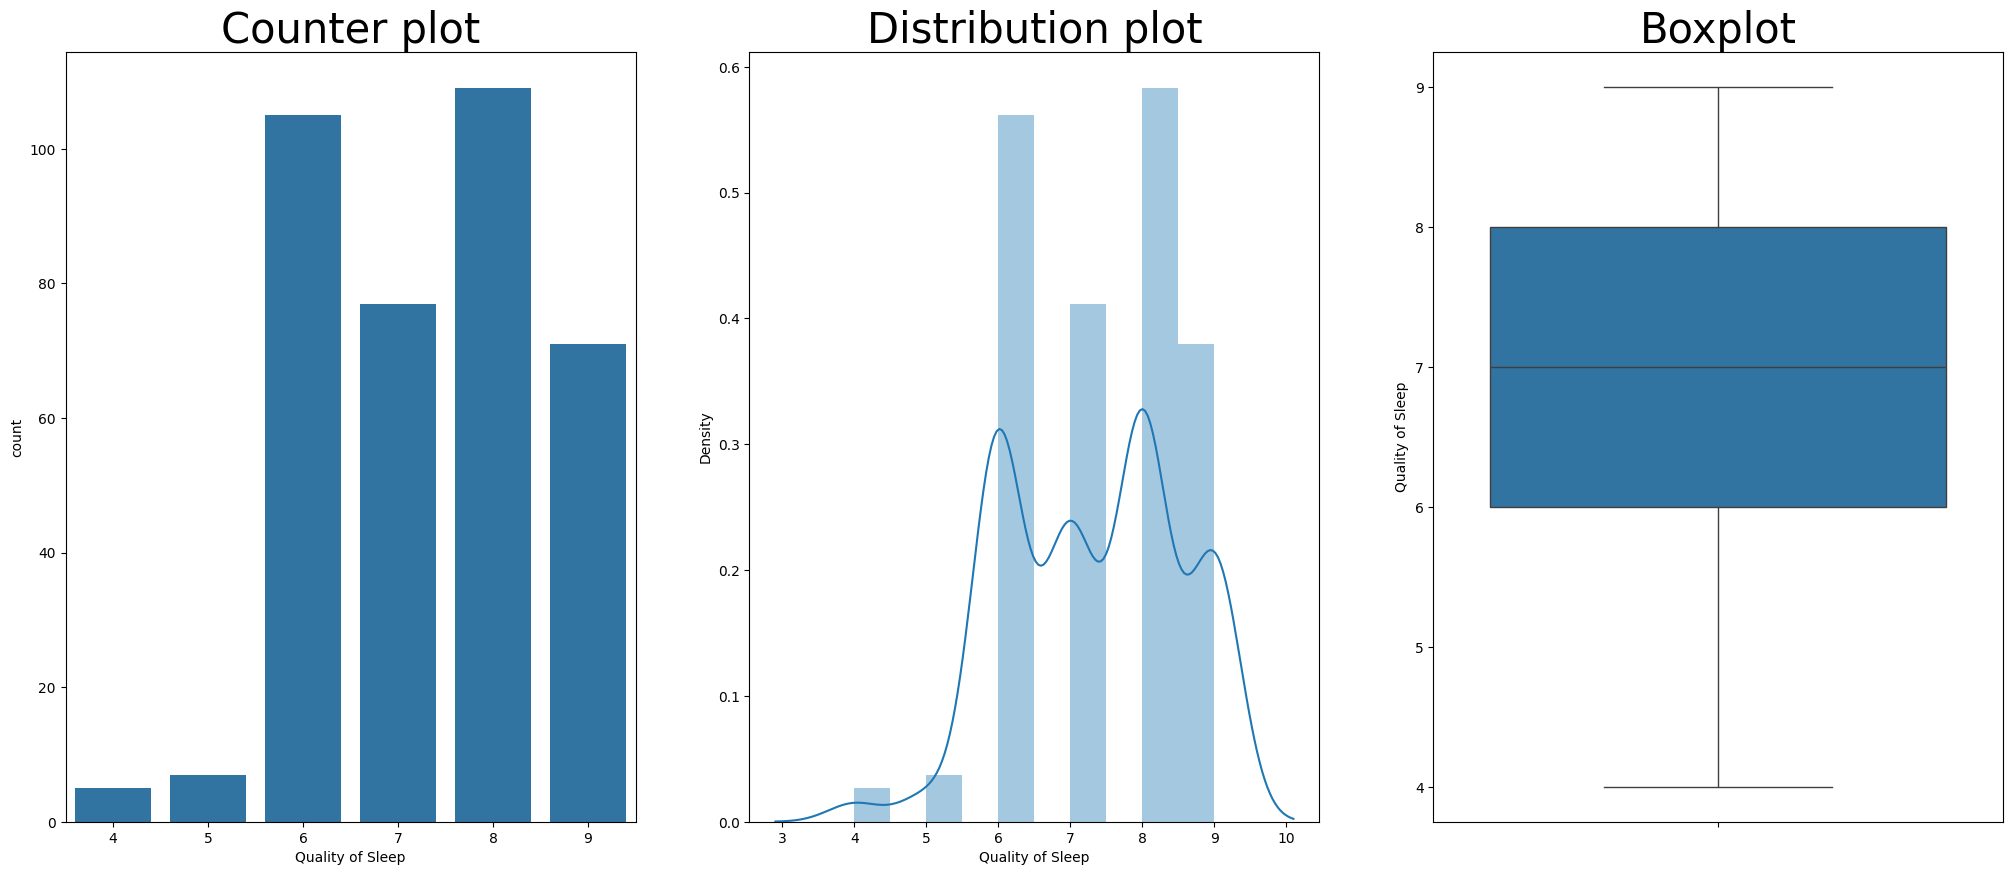

In [127]:
plt.figure(figsize=(25,10))
plt.subplot(1,3,1)
plt.title('Counter plot',fontsize=30)
sns.countplot(x='Quality of Sleep',data=df)
plt.subplot(1,3,2)
plt.title('Distribution plot',fontsize=30)
sns.distplot(df["Quality of Sleep"])
plt.subplot(1,3,3)
plt.title('Boxplot',fontsize=30)
sns.boxplot(y=df["Quality of Sleep"])

/tmp/ipython-input-3330360778.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Sleep Duration"])


<Axes: title={'center': 'Boxplot'}, ylabel='Sleep Duration'>

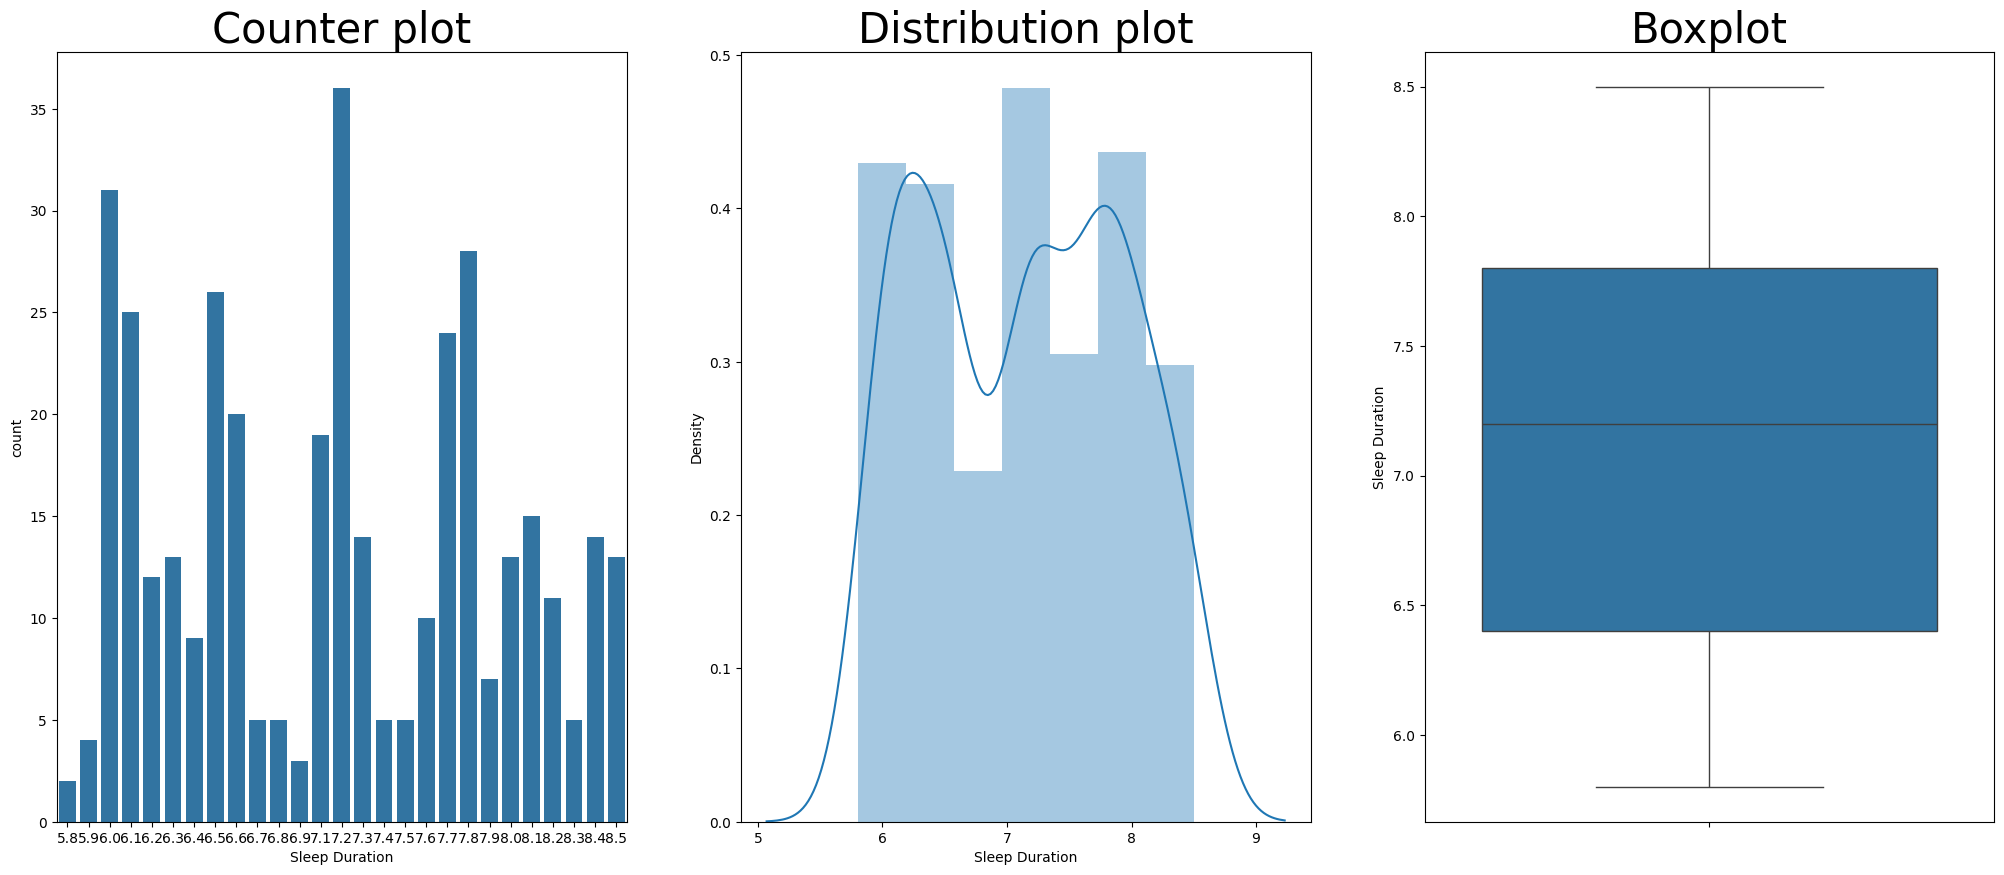

In [128]:
plt.figure(figsize=(25,10))
plt.subplot(1,3,1)
plt.title('Counter plot',fontsize=30)
sns.countplot(x='Sleep Duration',data=df)
plt.subplot(1,3,2)
plt.title('Distribution plot',fontsize=30)
sns.distplot(df["Sleep Duration"])
plt.subplot(1,3,3)
plt.title('Boxplot',fontsize=30)
sns.boxplot(y=df["Sleep Duration"])

/tmp/ipython-input-1407945191.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Physical Activity Level"])


<Axes: title={'center': 'Boxplot'}, ylabel='Physical Activity Level'>

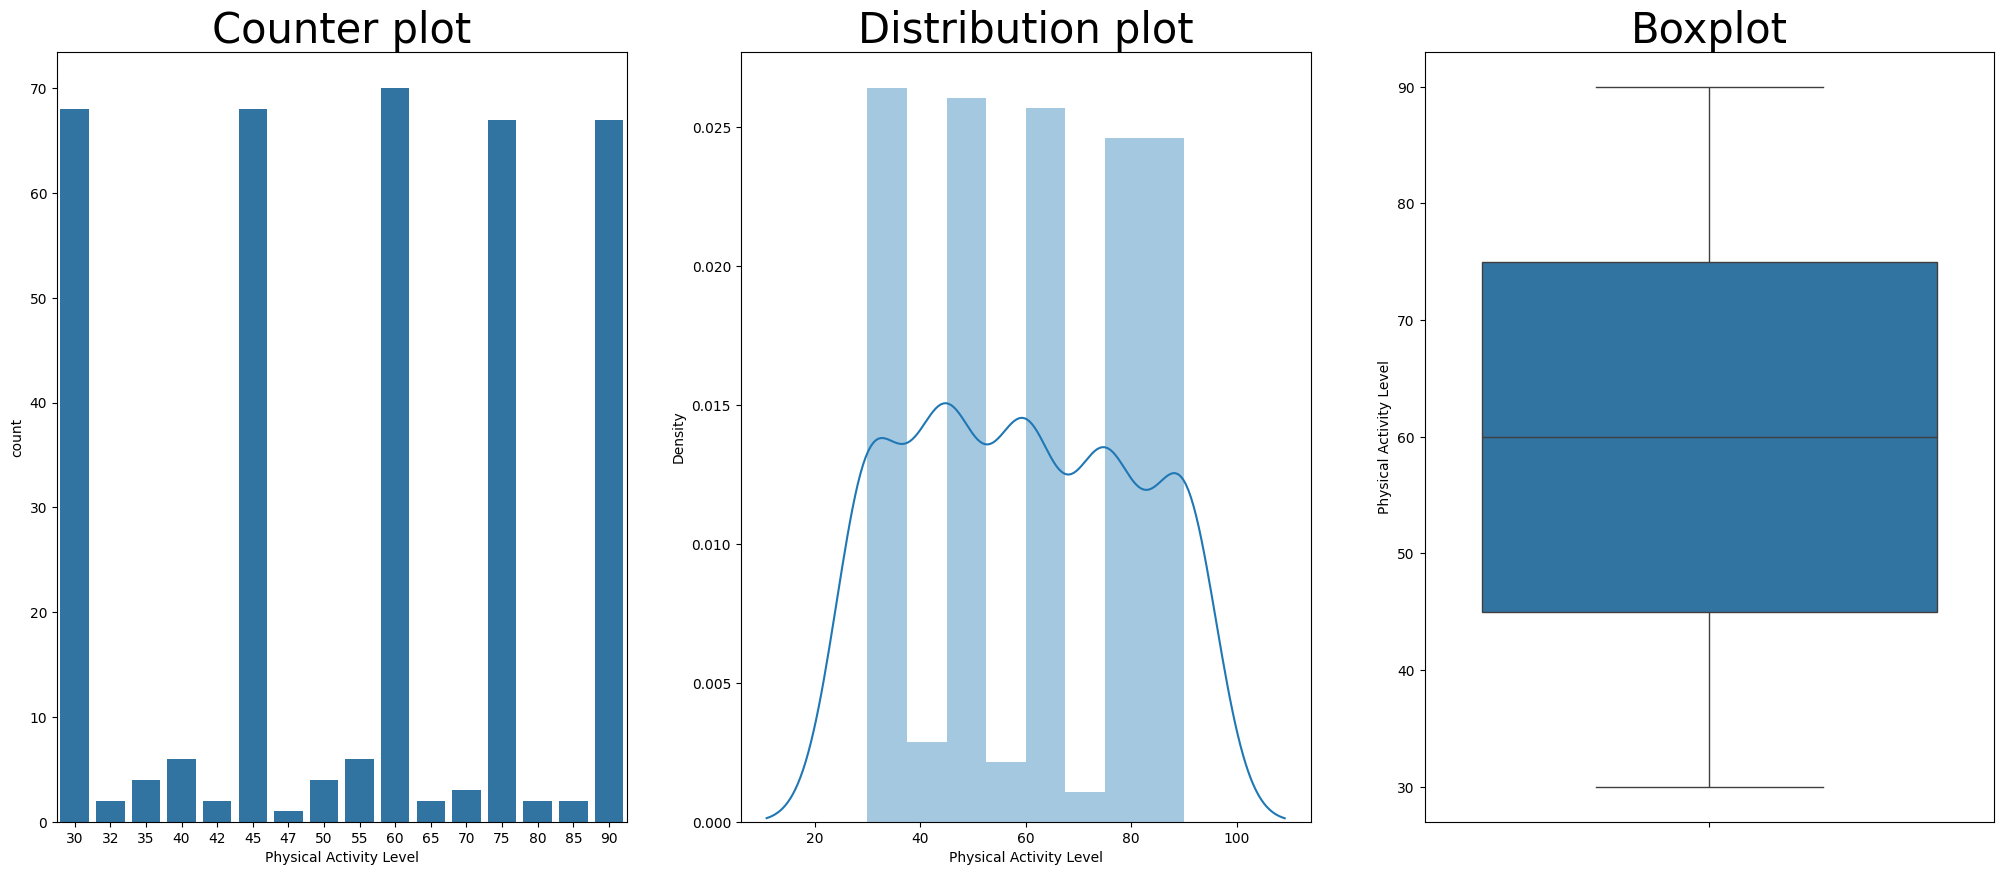

In [173]:
plt.figure(figsize=(25,10))
plt.subplot(1,3,1)
plt.title('Counter plot',fontsize=30)
sns.countplot(x='Physical Activity Level',data=df)
plt.subplot(1,3,2)
plt.title('Distribution plot',fontsize=30)
sns.distplot(df["Physical Activity Level"])
plt.subplot(1,3,3)
plt.title('Boxplot',fontsize=30)
sns.boxplot(y=df["Physical Activity Level"])

/tmp/ipython-input-2834883127.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Heart Rate"])


<Axes: title={'center': 'Boxplot'}, ylabel='Heart Rate'>

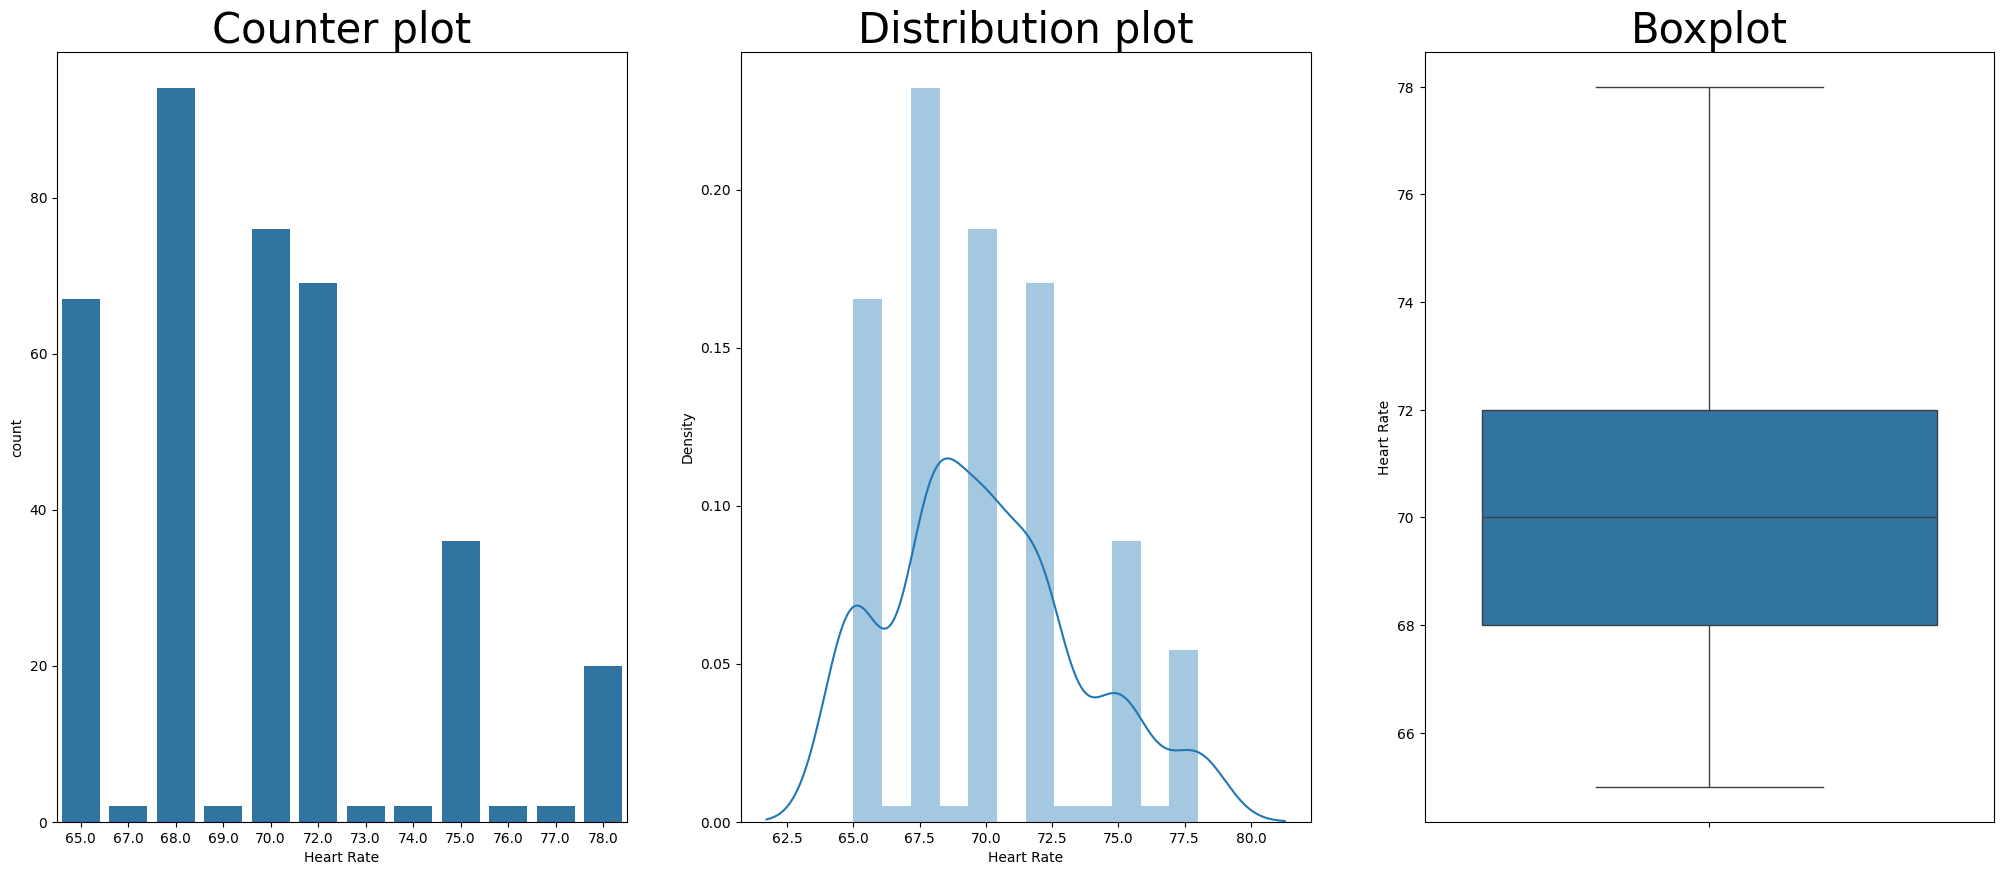

In [174]:
plt.figure(figsize=(25,10))
plt.subplot(1,3,1)
plt.title('Counter plot',fontsize=30)
sns.countplot(x='Heart Rate',data=df)
plt.subplot(1,3,2)
plt.title('Distribution plot',fontsize=30)
sns.distplot(df["Heart Rate"])
plt.subplot(1,3,3)
plt.title('Boxplot',fontsize=30)
sns.boxplot(y=df["Heart Rate"])

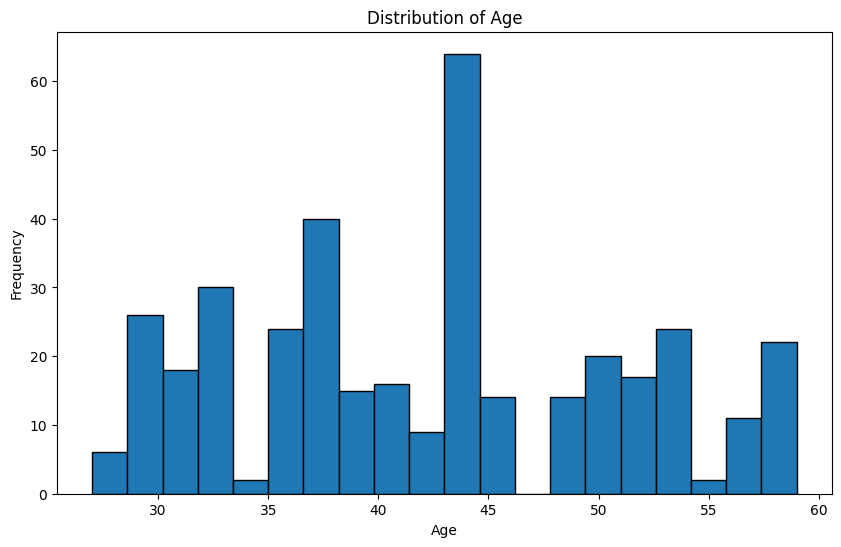

In [129]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

In [130]:
df = df.drop('Person ID', axis=1)
display(df.head())

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Blood Pressure Status
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder,Hypertension Stage 1
1,Male,28,Doctor,6.2,6,60,8,Normal Weight,125/80,75,10000,No Disorder,Elevated
2,Male,28,Doctor,6.2,6,60,8,Normal Weight,125/80,75,10000,No Disorder,Elevated
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Hypertension Stage 1
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Hypertension Stage 1


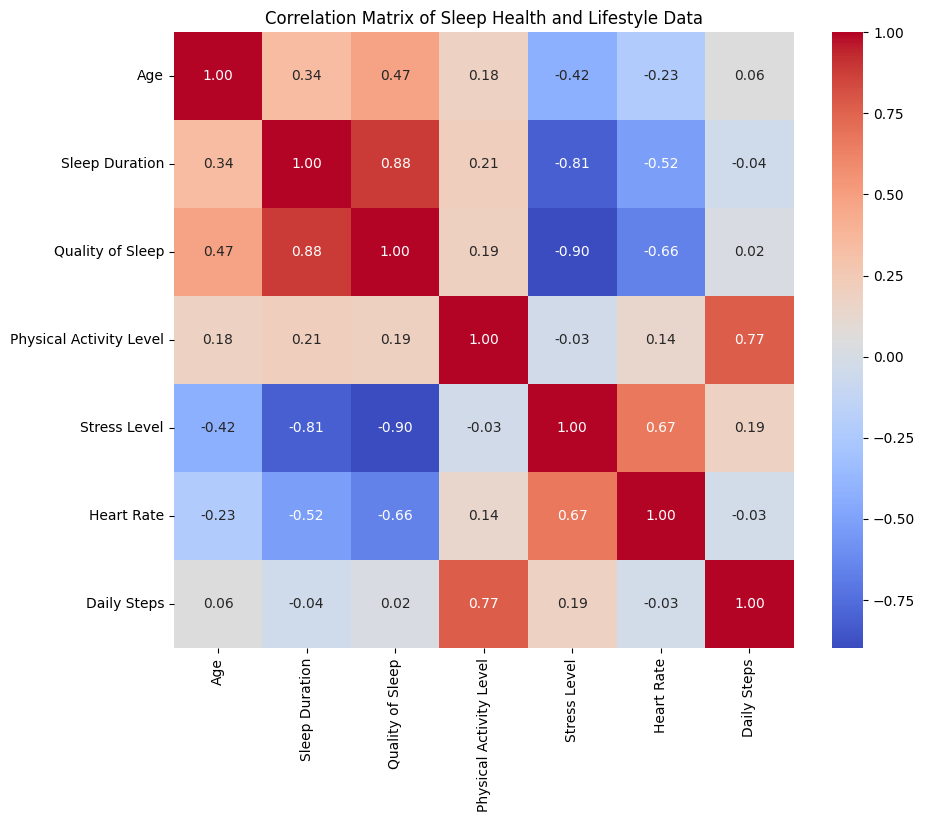

In [131]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Sleep Health and Lifestyle Data')
plt.show()

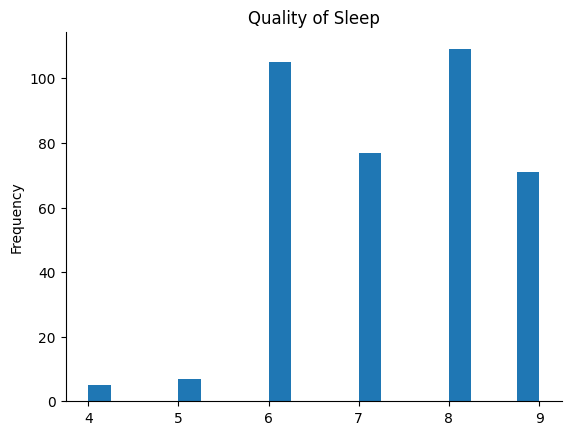

In [132]:
# @title Quality of Sleep

from matplotlib import pyplot as plt
df['Quality of Sleep'].plot(kind='hist', bins=20, title='Quality of Sleep')
plt.gca().spines[['top', 'right',]].set_visible(False)

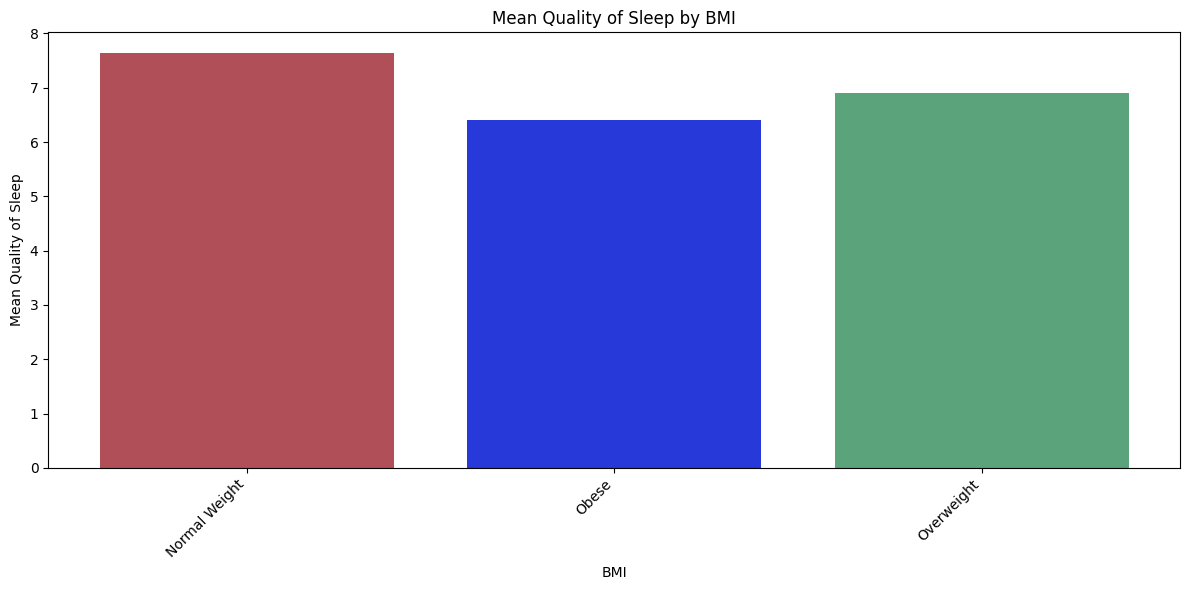

In [133]:
mean_quality_bmi = df.groupby('BMI Category')['Quality of Sleep'].mean()
categories = mean_quality_bmi.index
values = mean_quality_bmi.values
colors = ["#b04f58", "#2739d8", "#5ba47b"]

plt.figure(figsize=(12, 6))
plt.bar(categories, values, color=colors)

plt.ylabel("Mean Quality of Sleep")
plt.xlabel("BMI")
plt.title("Mean Quality of Sleep by BMI")
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

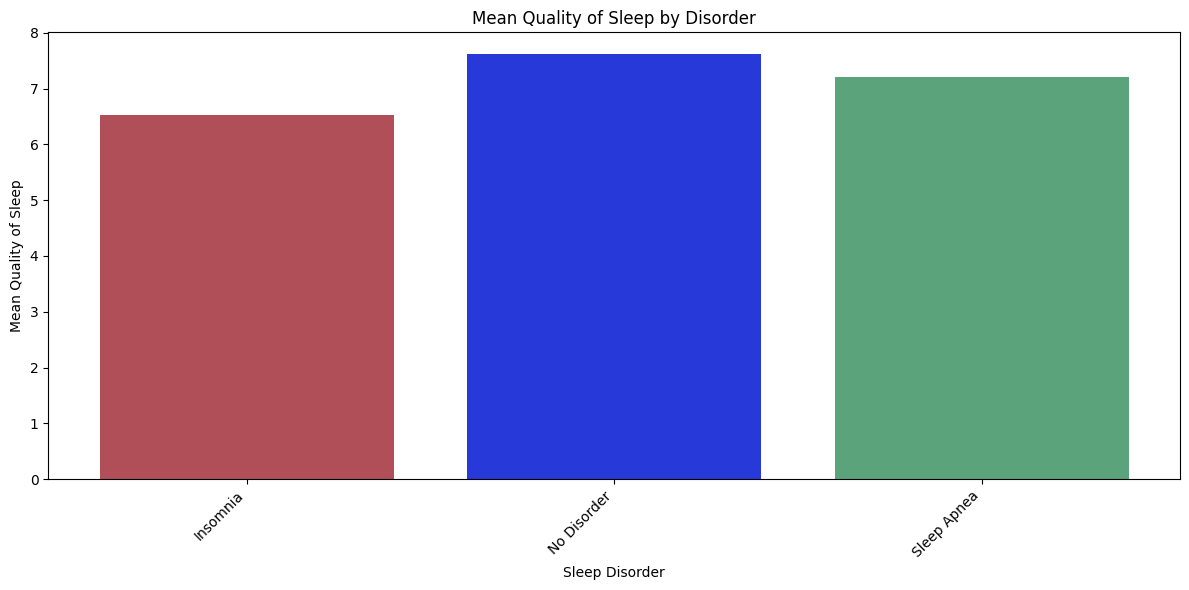

In [134]:
mean_quality_sleep_disorder = df.groupby('Sleep Disorder')['Quality of Sleep'].mean()
categories = mean_quality_sleep_disorder.index
values = mean_quality_sleep_disorder.values
colors = ["#b04f58", "#2739d8", "#5ba47b"]

plt.figure(figsize=(12, 6))
plt.bar(categories, values, color=colors)

plt.ylabel("Mean Quality of Sleep")
plt.xlabel("Sleep Disorder")
plt.title("Mean Quality of Sleep by Disorder")
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

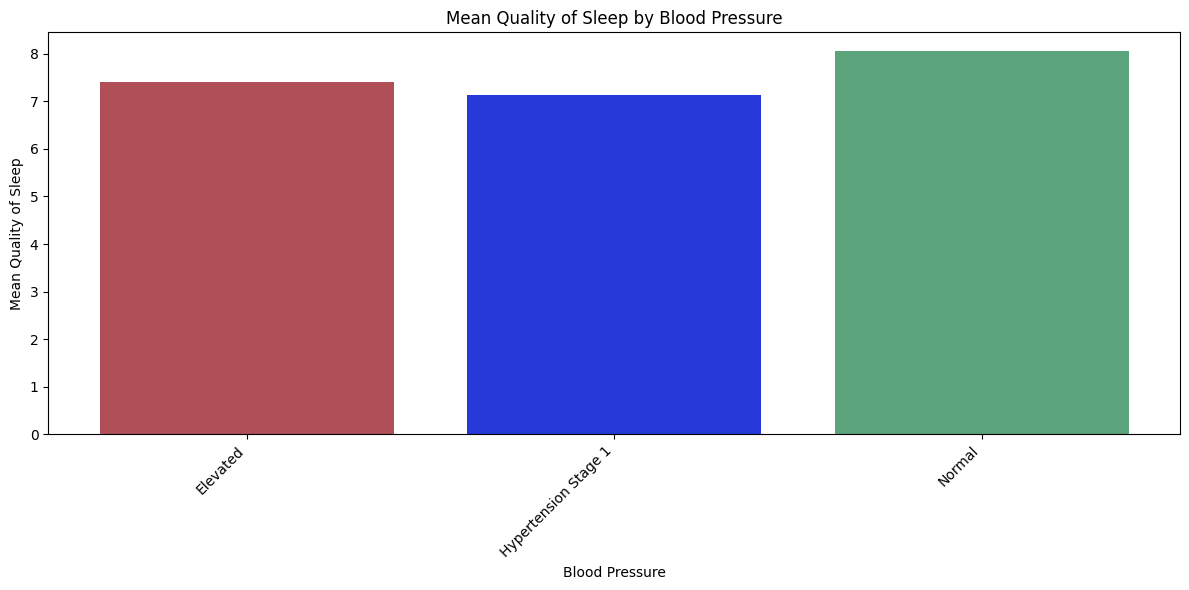

In [135]:
mean_quality_blood_pressure = df.groupby('Blood Pressure Status')['Quality of Sleep'].mean()
categories = mean_quality_blood_pressure.index
values = mean_quality_blood_pressure.values
colors = ["#b04f58", "#2739d8", "#5ba47b"]

plt.figure(figsize=(12, 6))
plt.bar(categories, values, color=colors)

plt.ylabel("Mean Quality of Sleep")
plt.xlabel("Blood Pressure")
plt.title("Mean Quality of Sleep by Blood Pressure")
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

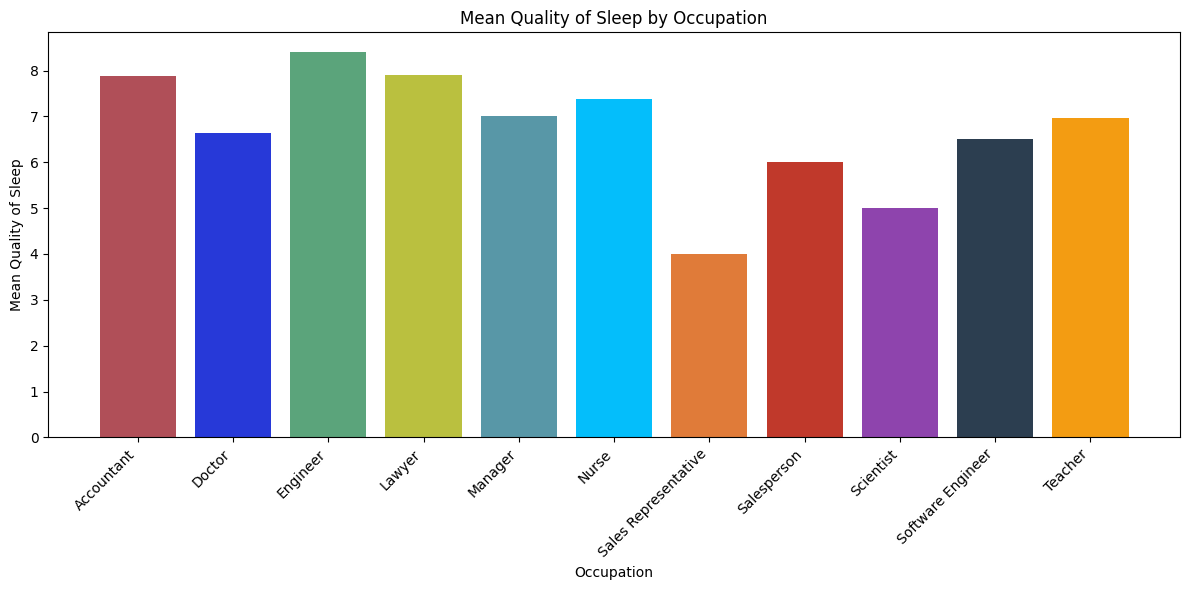

In [136]:
mean_quality_by_occupation = df.groupby('Occupation')['Quality of Sleep'].mean()
categories = mean_quality_by_occupation.index
values = mean_quality_by_occupation.values
colors = ["#b04f58", "#2739d8", "#5ba47b", "#bac03f", "#5897a7", "#04befb", "#e07b39", "#c0392b", "#8e44ad", "#2c3e50", "#f39c12"]

plt.figure(figsize=(12, 6))
plt.bar(categories, values, color=colors)

plt.ylabel("Mean Quality of Sleep")
plt.xlabel("Occupation")
plt.title("Mean Quality of Sleep by Occupation")
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

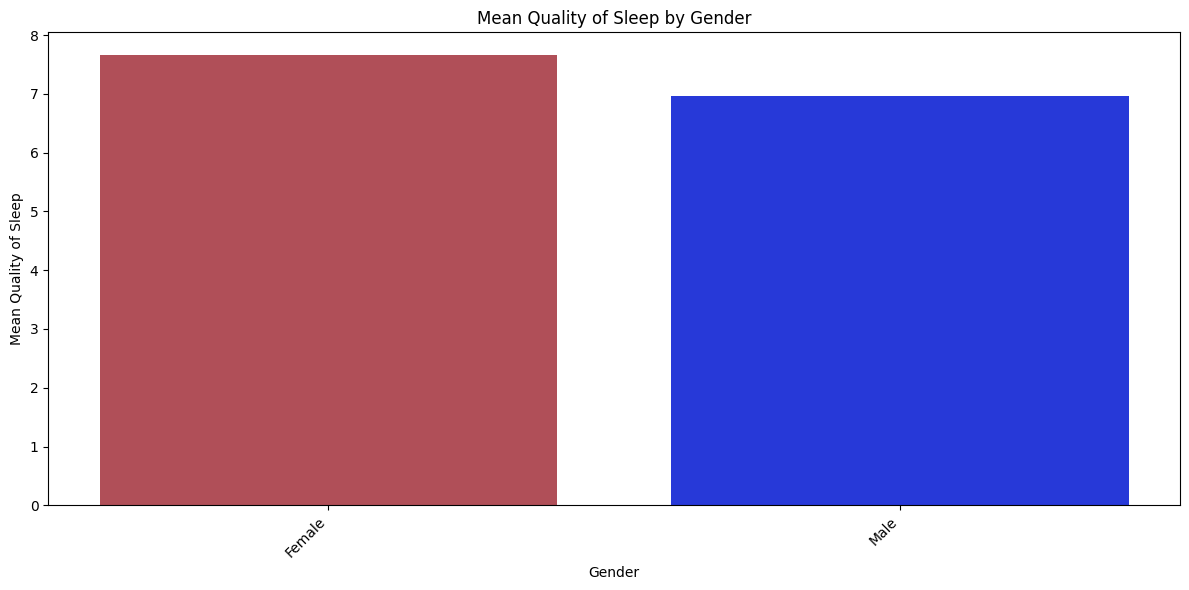

In [137]:
mean_quality_by_gender = df.groupby('Gender')['Quality of Sleep'].mean()
categories = mean_quality_by_gender.index
values = mean_quality_by_gender.values
colors = ["#b04f58", "#2739d8"]

plt.figure(figsize=(12, 6))
plt.bar(categories, values, color=colors)

plt.ylabel("Mean Quality of Sleep")
plt.xlabel("Gender")
plt.title("Mean Quality of Sleep by Gender")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Relationships

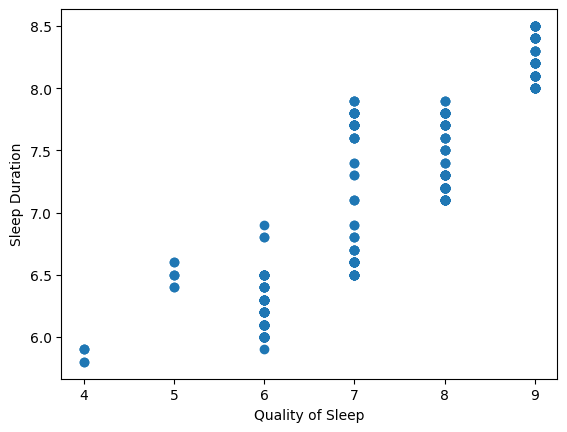

In [138]:
x=df["Quality of Sleep"]
y=df["Sleep Duration"]
plt.scatter(x,y)
plt.xlabel("Quality of Sleep")
plt.ylabel("Sleep Duration")
plt.show()

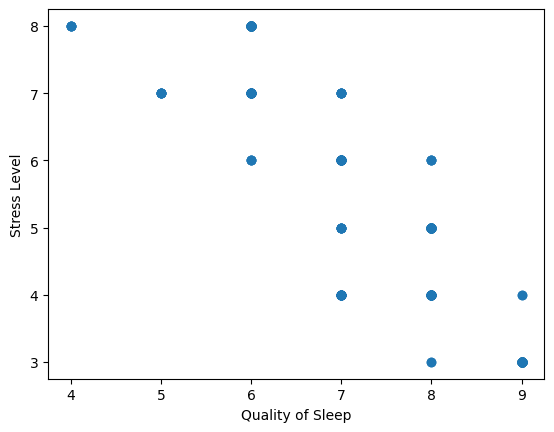

In [139]:
x=df["Quality of Sleep"]
y=df["Stress Level"]
plt.scatter(x,y)
plt.xlabel("Quality of Sleep")
plt.ylabel("Stress Level")
plt.show()

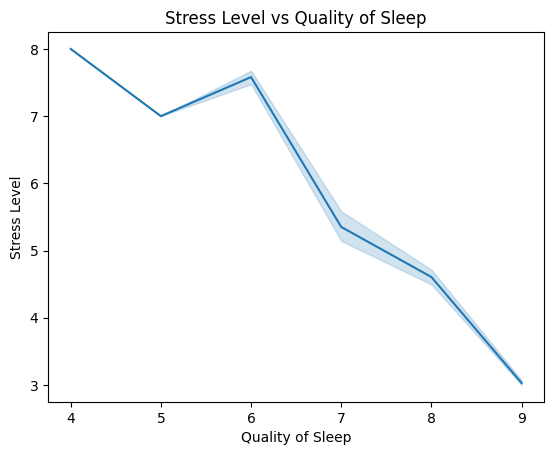

In [140]:
sns.lineplot(data=df, x=df['Quality of Sleep'], y=df['Stress Level'])
plt.xlabel("Quality of Sleep")
plt.ylabel("Stress Level")
plt.title("Stress Level vs Quality of Sleep")
plt.show()

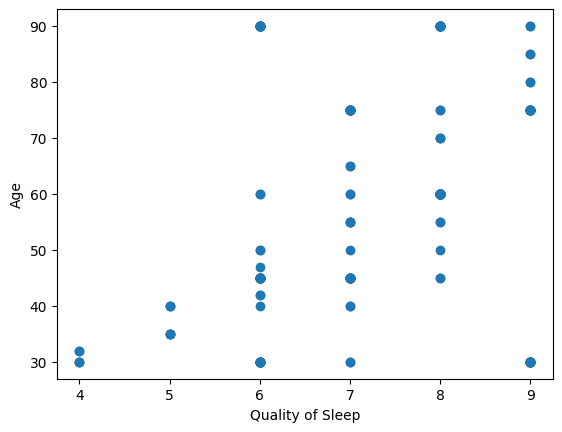

In [141]:
x=df['Quality of Sleep']
y=df['Physical Activity Level']
plt.scatter(x,y)
plt.xlabel("Quality of Sleep")
plt.ylabel("Age")
plt.show()

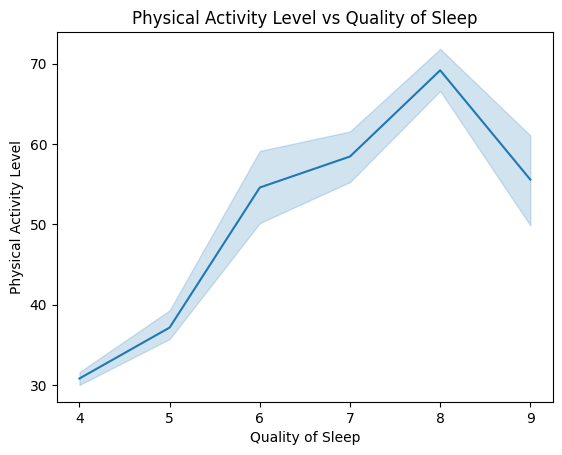

In [142]:
sns.lineplot(data=df, x=df['Quality of Sleep'], y=df['Physical Activity Level'])
plt.xlabel("Quality of Sleep")
plt.ylabel("Physical Activity Level")
plt.title("Physical Activity Level vs Quality of Sleep")
plt.show()

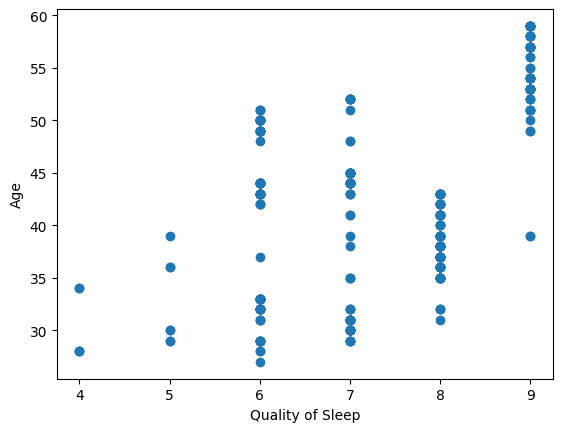

In [143]:
x=df['Quality of Sleep']
y=df['Age']
plt.scatter(x,y)
plt.xlabel("Quality of Sleep")
plt.ylabel("Age")
plt.show()

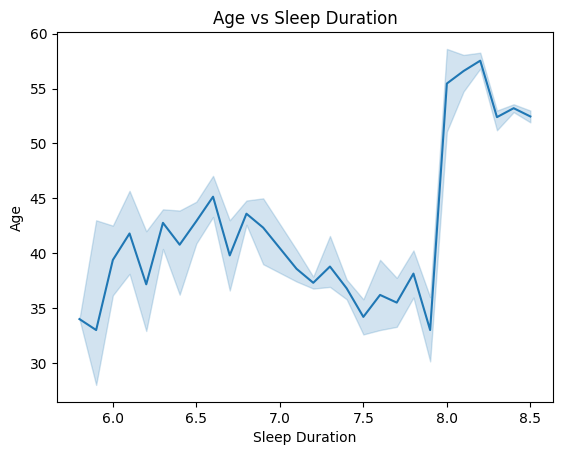

In [144]:
sns.lineplot(data=df, x=df['Sleep Duration'], y=df['Age'])
plt.xlabel("Sleep Duration")
plt.ylabel("Age")
plt.title("Age vs Sleep Duration")
plt.show()

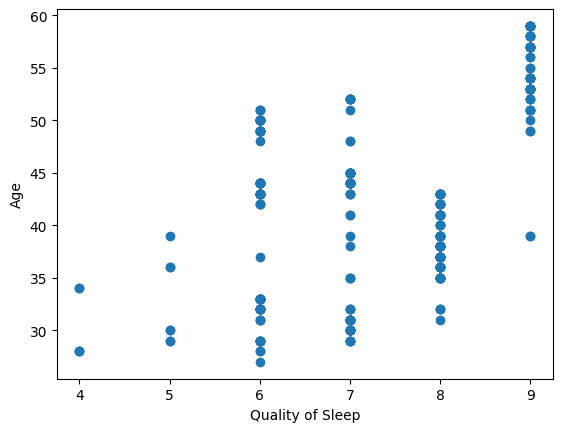

In [145]:
x= df['Quality of Sleep']
y=df['Age']
plt.scatter(x,y)
plt.xlabel("Quality of Sleep")
plt.ylabel("Age")
plt.show()

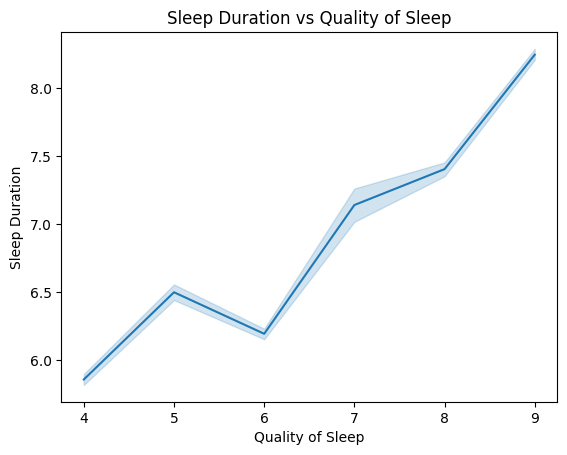

In [146]:
sns.lineplot(data=df, x=df['Quality of Sleep'], y=df['Sleep Duration'])
plt.xlabel("Quality of Sleep")
plt.ylabel("Sleep Duration")
plt.title("Sleep Duration vs Quality of Sleep")
plt.show()

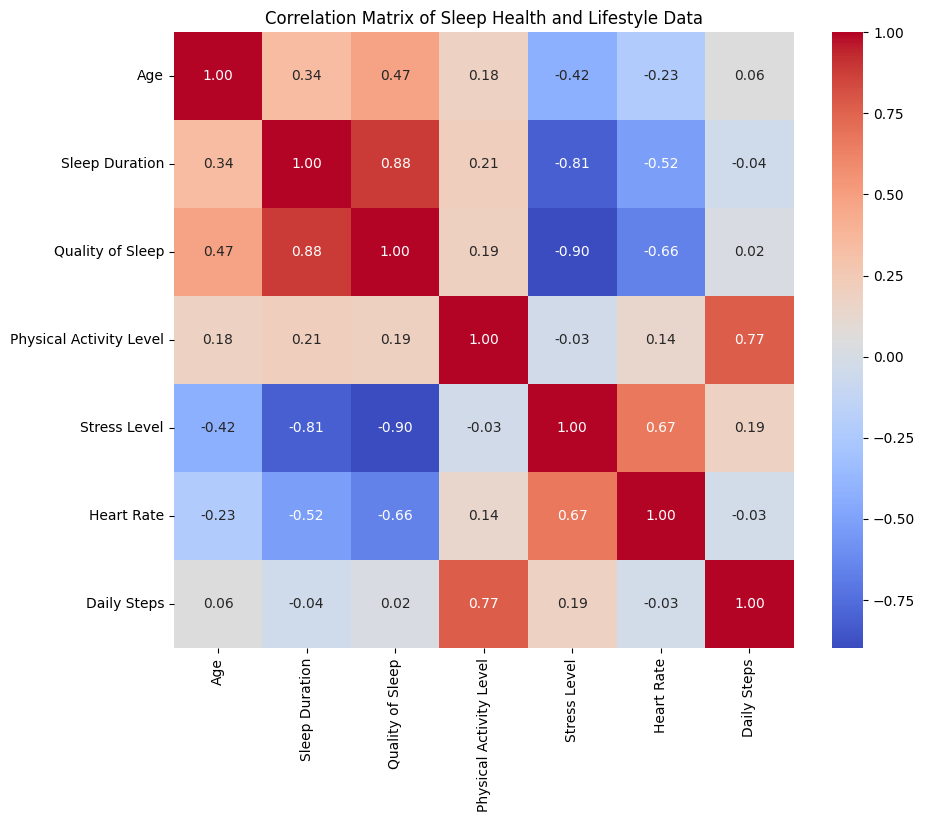

In [147]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Sleep Health and Lifestyle Data')
plt.show()

In [148]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Blood Pressure Status
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder,Hypertension Stage 1
1,Male,28,Doctor,6.2,6,60,8,Normal Weight,125/80,75,10000,No Disorder,Elevated
2,Male,28,Doctor,6.2,6,60,8,Normal Weight,125/80,75,10000,No Disorder,Elevated
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Hypertension Stage 1
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Hypertension Stage 1


Sleep Disorder

In [149]:
disorder_gender=df.groupby('Gender')['Sleep Disorder'].value_counts()
disorder_gender

Gender  Sleep Disorder
Female  No Disorder        82
        Sleep Apnea        67
        Insomnia           36
Male    No Disorder       137
        Insomnia           41
        Sleep Apnea        11
Name: count, dtype: int64

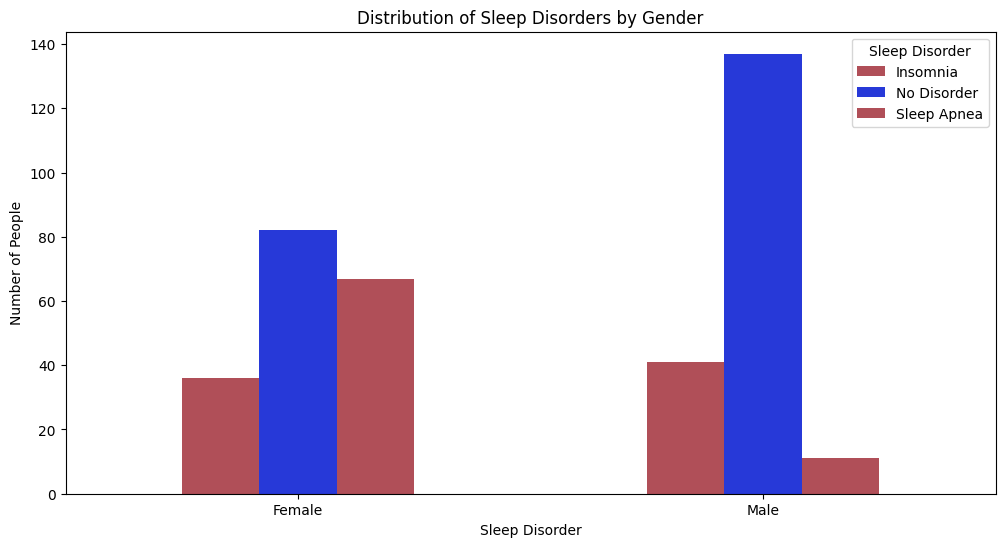

In [150]:
disorder_gender_unstacked = disorder_gender.unstack()

disorder_gender_unstacked.plot(kind='bar', figsize=(12, 6), color=["#b04f58", "#2739d8"])
plt.ylabel("Number of People")
plt.xlabel("Sleep Disorder")
plt.title("Distribution of Sleep Disorders by Gender")
plt.xticks(rotation=0)
plt.show()

In [151]:
disorder_occupation=df.groupby('Occupation')['Sleep Disorder'].value_counts()
disorder_occupation

Occupation            Sleep Disorder
Accountant            No Disorder       30
                      Insomnia           7
Doctor                No Disorder       64
                      Sleep Apnea        4
                      Insomnia           3
Engineer              No Disorder       57
                      Insomnia           5
                      Sleep Apnea        1
Lawyer                No Disorder       42
                      Sleep Apnea        3
                      Insomnia           2
Manager               No Disorder        1
Nurse                 Sleep Apnea       61
                      No Disorder        9
                      Insomnia           3
Sales Representative  Sleep Apnea        2
Salesperson           Insomnia          29
                      No Disorder        2
                      Sleep Apnea        1
Scientist             No Disorder        2
                      Sleep Apnea        2
Software Engineer     No Disorder        3
                      Insomnia           1
Teacher               Insomnia          27
                      No Disorder        9
                      Sleep Apnea        4
Name: count, dtype: int64

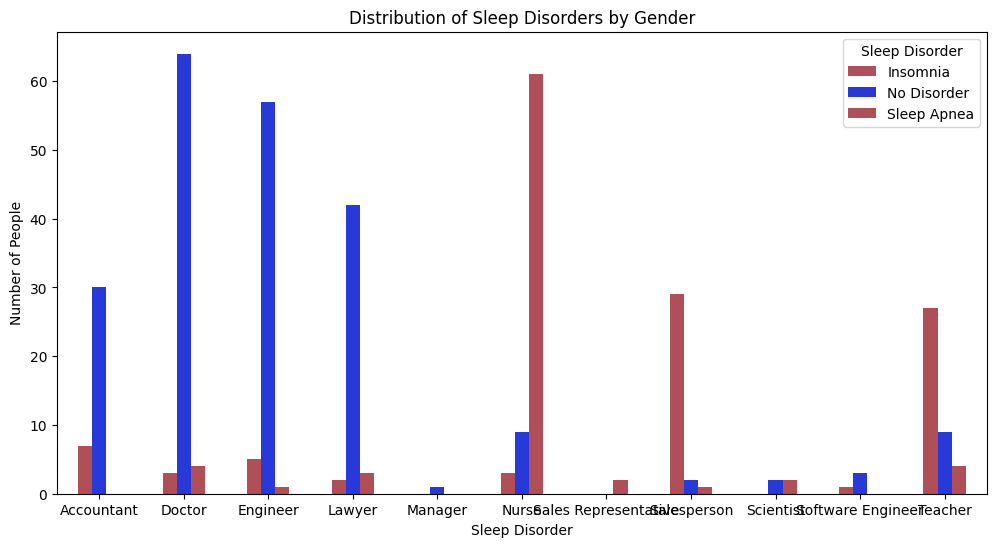

In [152]:
disorder_occupation_unstacked = disorder_occupation.unstack()

disorder_occupation_unstacked.plot(kind='bar', figsize=(12, 6), color=["#b04f58", "#2739d8"])
plt.ylabel("Number of People")
plt.xlabel("Sleep Disorder")
plt.title("Distribution of Sleep Disorders by Gender")
plt.xticks(rotation=0)
plt.show()

Text(0.5, 1.0, 'Mean Quality of Sleep by Disorder')

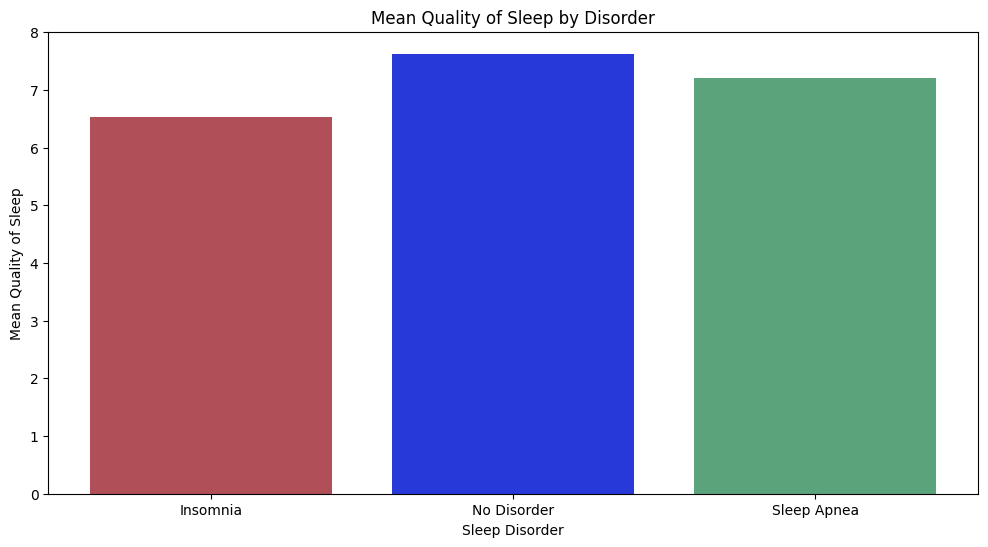

In [153]:
mean_quality_sleep_disorders = df.groupby('Sleep Disorder')['Quality of Sleep'].mean()
categories = mean_quality_sleep_disorders.index
values = mean_quality_sleep_disorders.values
colors = ["#b04f58", "#2739d8", "#5ba47b"]

plt.figure(figsize=(12, 6))
plt.bar(categories, values, color=colors)

plt.ylabel("Mean Quality of Sleep")
plt.xlabel("Sleep Disorder")
plt.title("Mean Quality of Sleep by Disorder")

Handling Outliers

In [154]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Blood Pressure Status
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder,Hypertension Stage 1
1,Male,28,Doctor,6.2,6,60,8,Normal Weight,125/80,75,10000,No Disorder,Elevated
2,Male,28,Doctor,6.2,6,60,8,Normal Weight,125/80,75,10000,No Disorder,Elevated
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Hypertension Stage 1
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Hypertension Stage 1


In [155]:
def handle_outliers(data, columns):
    for column in columns:
        if column in data.columns:
            q1 = df[column].quantile(0.25)
            q3 = df[column].quantile(0.75)
            iqr = q3 - q1
            low_b = q1 - 1.5 * iqr
            high_b = q3 + 1.5 * iqr

            outliers = (df[column] < low_b) | (df[column] > high_b)

            if outliers.any():
                print(f"{column}: has outliers")
                df[column] = np.where(df[column] < low_b, low_b,
                                    np.where(df[column] > high_b, high_b, df[column]))
            else:
                print(f"{column}: no outliers")

    return data

num_col = df.select_dtypes(include='number').columns
df = handle_outliers(df, num_col)

Age: no outliers
Sleep Duration: no outliers
Quality of Sleep: no outliers
Physical Activity Level: no outliers
Stress Level: no outliers
Heart Rate: has outliers
Daily Steps: no outliers


Model Building

In [156]:
#encoding bmi
#df['BMI Category'] = df['BMI Category'].replace('Normal Weight', 0)
#df['BMI Category'] = df['BMI Category'].replace('Overweight', 1)
#df['BMI Category'] = df['BMI Category'].replace('Obese', 2)

In [157]:
# labelEncoder present in scikitlearn library
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['BMI Category'] = le.fit_transform(df['BMI Category'])


In [158]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Blood Pressure Status'] = le.fit_transform(df['Blood Pressure Status'])


In [159]:
#one hot encoded occupation
# df = pd.get_dummies(df, prefix=['Occupation'], columns=['Occupation'])
# df.head(10)

In [160]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.select_dtypes(include=np.number).drop('Quality of Sleep', axis=1)
y = df['Quality of Sleep']
#if we want to use other columns so that the machine learning model may understnd, we must encode

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data splitting complete.")

Data splitting complete.


In [161]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.08709509388226283
R-squared: 0.9422684535602488


In [162]:
df.head(
)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Blood Pressure Status
0,Male,27,Software Engineer,6.1,6,42,6,2,126/83,77.0,4200,No Disorder,1
1,Male,28,Doctor,6.2,6,60,8,0,125/80,75.0,10000,No Disorder,0
2,Male,28,Doctor,6.2,6,60,8,0,125/80,75.0,10000,No Disorder,0
3,Male,28,Sales Representative,5.9,4,30,8,1,140/90,78.0,3000,Sleep Apnea,1
4,Male,28,Sales Representative,5.9,4,30,8,1,140/90,78.0,3000,Sleep Apnea,1


In [163]:
# # Get user input for each feature
# age = int(input("Enter Age: "))
# sleep_duration = float(input("Enter Sleep Duration: "))
# physical_activity_level = int(input("Enter Physical Activity Level: "))
# stress_level = int(input("Enter Stress Level: "))
# heart_rate = int(input("Enter Heart Rate: "))
# daily_steps = int(input("Enter Daily Steps: "))

# # Create a new DataFrame with the user-provided features for prediction
# new_data = pd.DataFrame({
#     'Age': [age],
#     'Sleep Duration': [sleep_duration],
#     'Physical Activity Level': [physical_activity_level],
#     'Stress Level': [stress_level],
#     'Heart Rate': [heart_rate],
#     'Daily Steps': [daily_steps]
# })

# # Predict the Quality of Sleep using the trained model
# predicted_quality = model.predict(new_data)

# print(f"Predicted Quality of Sleep: {predicted_quality[0]}")

In [164]:
df["Physical Activity Level"].unique()

array([42, 60, 30, 40, 75, 35, 45, 50, 32, 70, 80, 55, 90, 47, 65, 85])

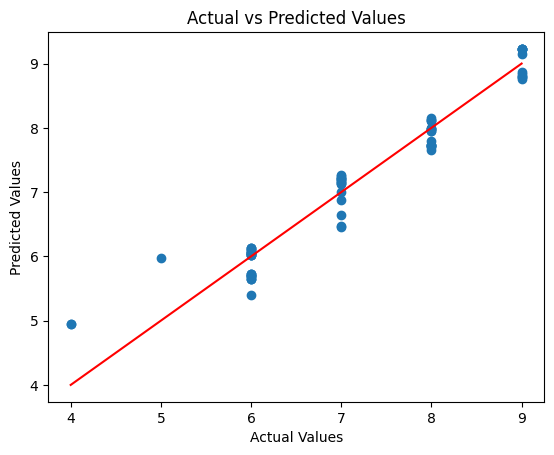

In [165]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()

In [166]:
print("\nFirst 5 Actual vs Predicted values:")
for actual, predicted in zip(y_test[:5], y_pred[:5]):
    print(f"Actual: {actual}, Predicted: {predicted}")


First 5 Actual vs Predicted values:
Actual: 9, Predicted: 9.219945833463928
Actual: 6, Predicted: 5.646697440000536
Actual: 6, Predicted: 5.6966919594342915
Actual: 9, Predicted: 9.219945833463928
Actual: 6, Predicted: 5.654544952895152


In [167]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Blood Pressure Status
0,Male,27,Software Engineer,6.1,6,42,6,2,126/83,77.0,4200,No Disorder,1
1,Male,28,Doctor,6.2,6,60,8,0,125/80,75.0,10000,No Disorder,0
2,Male,28,Doctor,6.2,6,60,8,0,125/80,75.0,10000,No Disorder,0
3,Male,28,Sales Representative,5.9,4,30,8,1,140/90,78.0,3000,Sleep Apnea,1
4,Male,28,Sales Representative,5.9,4,30,8,1,140/90,78.0,3000,Sleep Apnea,1


In [168]:
# Select all columns except 'Sleep Disorder' as features
X = df.drop('Sleep Disorder', axis=1).select_dtypes(include=np.number).drop('Quality of Sleep', axis=1)
y = df['Sleep Disorder']

In [169]:
X.head()


,Age,Sleep Duration,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Blood Pressure Status
0,27,6.1,42,6,2,77.0,4200,1
1,28,6.2,60,8,0,75.0,10000,0
2,28,6.2,60,8,0,75.0,10000,0
3,28,5.9,30,8,1,78.0,3000,1
4,28,5.9,30,8,1,78.0,3000,1


In [170]:


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 1.0


In [171]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data splitting complete.")

Data splitting complete.


In [172]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.88
